In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import rasterio
from rasterio.plot import show
import cartopy.crs as ccrs # probably needs to be installed with pip...
import pyproj
from shapely.geometry import Point

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
ws = pd.read_csv('./data/weather_station_list.csv')
ws.head()

,station_id,start_date,end_date,elevation,ycoord,xcoord,name
0,174,19840301,19871231,250,49.1886,7.9766,Annweiler-Bindersbach
1,377,19470101,20240311,210,49.1070,7.9967,"Bergzabern,"
2,1072,19520101,20240311,107,49.4719,8.1929,"Dürkheim,"
3,1073,19360101,19521231,115,49.4686,8.1797,"Dürkheim,"
4,1428,19480101,19571231,230,49.2275,8.0585,Frankweiler


In [19]:
# Create a geometry column with Point objects
geometry = [Point(x, y) for x, y in zip(ws['xcoord'], ws['ycoord'])]

# Create a GeoDataFrame from the DataFrame and geometry column
ws = gpd.GeoDataFrame(ws, geometry=geometry, crs='EPSG:4326')
ws.start_date = pd.to_datetime(ws.start_date)
ws.end_date = pd.to_datetime(ws.end_date)
ws.head()

,station_id,start_date,end_date,elevation,ycoord,xcoord,name,geometry
0,174,1970-01-01 00:00:00.019840301,1970-01-01 00:00:00.019871231,250,49.1886,7.9766,Annweiler-Bindersbach,POINT (7.97660 49.18860)
1,377,1970-01-01 00:00:00.019470101,1970-01-01 00:00:00.020240311,210,49.1070,7.9967,"Bergzabern,",POINT (7.99670 49.10700)
2,1072,1970-01-01 00:00:00.019520101,1970-01-01 00:00:00.020240311,107,49.4719,8.1929,"Dürkheim,",POINT (8.19290 49.47190)
3,1073,1970-01-01 00:00:00.019360101,1970-01-01 00:00:00.019521231,115,49.4686,8.1797,"Dürkheim,",POINT (8.17970 49.46860)
4,1428,1970-01-01 00:00:00.019480101,1970-01-01 00:00:00.019571231,230,49.2275,8.0585,Frankweiler,POINT (8.05850 49.22750)


In [5]:
gs = pd.read_csv('./data/groundwater/stations.txt', sep=';')
gs.head()

,station_id,x,y
0,2377139400,441168,5452408
1,2377148500,448220,5452589
2,2377150000,450424,5452258
3,2377179100,454597,5453021
4,2377194000,458751,5457047


In [6]:
# Create a geometry column with Point objects
geometry = [Point(x, y) for x, y in zip(gs['x'], gs['y'])]

# Create a GeoDataFrame from the DataFrame and geometry column
gs = gpd.GeoDataFrame(gs, geometry=geometry, crs='EPSG:25832')
gs = gs.to_crs('EPSG:4326')
gs

,station_id,x,y,geometry
0,2377139400,441168,5452408,POINT (8.19206 49.22163)
1,2377148500,448220,5452589,POINT (8.28887 49.22390)
2,2377150000,450424,5452258,POINT (8.31918 49.22110)
3,2377179100,454597,5453021,POINT (8.37640 49.22829)
4,2377194000,458751,5457047,POINT (8.43303 49.26479)
5,2379142700,460131,5464423,POINT (8.45126 49.33123)
6,2378178400,456262,5462484,POINT (8.39823 49.31353)
7,2378115000,449605,5462474,POINT (8.30665 49.31292)
8,2378175100,443017,5465223,POINT (8.21562 49.33707)
9,2378190000,434221,5455017,POINT (8.09624 49.24439)


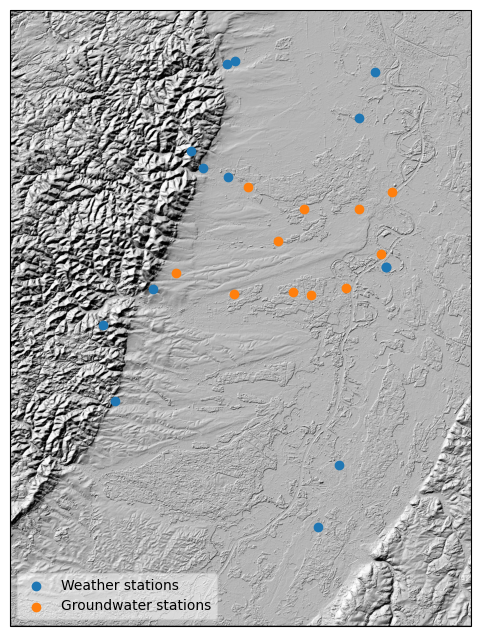

In [7]:
# Load hillshade DEM
dem_path = './data/dem/org30region_shaded.tif'
with rasterio.open(dem_path) as src:
    dem = src.read(1)
    extent = src.bounds

# Create a figure and axis with a PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 8), 
                       subplot_kw={'projection': ccrs.PlateCarree()} # removes axis labels
                      )

# Plot hillshade DEM
#plt.figure(figsize=(10, 8))
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(dem, 
          extent=(extent[0], extent[2], extent[1], extent[3]), 
          cmap='gray', origin='upper')

ws.plot(ax=ax, label='Weather stations')
gs.plot(ax=ax, label='Groundwater stations')
ax.legend(loc='lower left', framealpha=0.5)

# Show the plot
plt.show()

In [8]:
#g = pd.read_excel('./data/groundwater/gw.xlsx')
#g.info()

In [32]:
g = pd.read_csv('./data/groundwater/gw.csv')
g.date = pd.to_datetime(g.date)
g.set_index('date', inplace=True)
g.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21820 entries, 1954-11-01 to 1993-10-25
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   station_id   21820 non-null  int64  
 1   name         21820 non-null  object 
 2   elevation    21820 non-null  float64
 3   water_depth  21820 non-null  float64
 4   water_level  21820 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1022.8+ KB


In [33]:
g.describe()

,station_id,elevation,water_depth,water_level
count,2.182000e+04,21820.000000,21820.000000,21820.000000
mean,2.377712e+09,112.831093,3.965391,108.865701
std,6.053696e+05,15.928979,2.685128,14.969659
min,2.377139e+09,95.820000,0.200000,90.280000
25%,2.377150e+09,98.820000,2.130000,96.830000
50%,2.377194e+09,113.270000,3.130000,107.780000
75%,2.378175e+09,116.880000,5.490000,112.470000
max,2.379143e+09,201.320000,15.900000,185.760000


In [34]:
g.head()

,station_id,name,elevation,water_depth,water_level
date,,,,,
1954-11-01,2378135400,"1053 Böbingen,",113.27,1.50,111.77
1954-11-08,2378135400,"1053 Böbingen,",113.27,1.47,111.80
1954-11-15,2378135400,"1053 Böbingen,",113.27,1.47,111.80
1954-11-22,2378135400,"1053 Böbingen,",113.27,1.45,111.82
1954-11-29,2378135400,"1053 Böbingen,",113.27,1.42,111.85


In [35]:
g.station_id.unique()

array([2378135400, 2377150000, 2378178400, 2377179100, 2378115000,
       2378190000, 2378175100, 2377194000, 2377139400, 2377148500,
       2379142700])

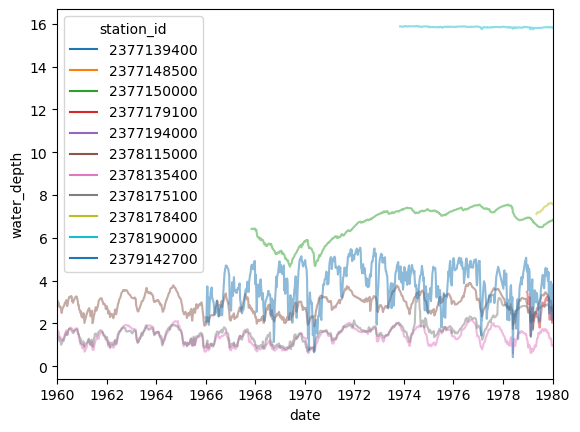

In [36]:
import seaborn as sns
#sns.set_style("white")
sns.color_palette('tab10')

sns.lineplot(x="date", y="water_depth",
             hue="station_id", 
             #style="event",
             palette='tab10',
             alpha=0.5,
             data=g)

# Set the x-axis limits
start_date = pd.to_datetime('1960-01-01')
end_date = pd.to_datetime('1980-01-10')
plt.xlim(start_date, end_date)

# Show the plot
plt.show()


<Axes: xlabel='date', ylabel='water_depth'>

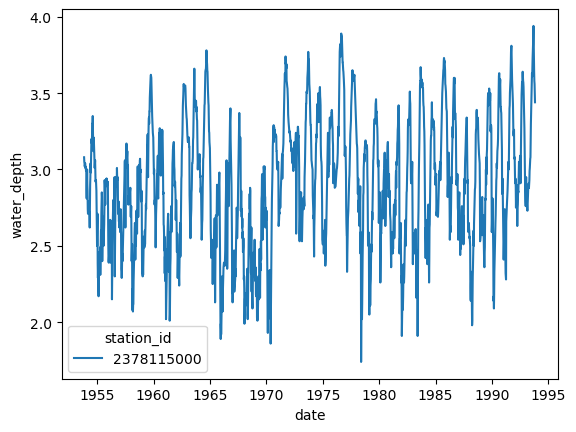

In [61]:
g_filtered = g.loc[g.station_id == 2378115000]

sns.lineplot(x="date", y="water_depth",
             hue="station_id", 
             #style="event",
             palette='tab10',
             data=g_filtered)

In [64]:
g_filtered.index.min()

Timestamp('1953-11-02 00:00:00')

## Check weather vs groundwater

In [38]:
w = pd.read_csv('./data/weather_collections/weather_daily_region.csv')

# change date column to datetime type
w.date = pd.to_datetime(w.date)#, format='%Y%m%d')
w.set_index('date', inplace=True)
w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53357 entries, 1876-01-01 to 2022-12-31
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station_id_count  53357 non-null  int64  
 1   precip_mean       53356 non-null  float64
 2   precip_min        53356 non-null  float64
 3   precip_max        53356 non-null  float64
 4   precip_std        28854 non-null  float64
 5   tmean_mean        53357 non-null  float64
 6   tmean_min         53357 non-null  float64
 7   tmean_max         53357 non-null  float64
 8   tmean_std         28855 non-null  float64
 9   tmax_mean         53357 non-null  float64
 10  tmax_min          53357 non-null  float64
 11  tmax_max          53357 non-null  float64
 12  tmax_std          28855 non-null  float64
 13  tmin_mean         53357 non-null  float64
 14  tmin_min          53357 non-null  float64
 15  tmin_max          53357 non-null  float64
 16  tmin_std          28855

In [82]:
precip_resampled = pd.DataFrame(w.precip_mean.resample('3M',
                             origin=g_filtered.index.min()).sum())
#precip_resampled = precip_resampled.reindex(g_filtered.index)
precip_resampled.head()

,precip_mean
date,
1876-01-31,51.7
1876-04-30,289.7
1876-07-31,215.2
1876-10-31,241.9
1877-01-31,252.9


In [83]:
g_filtered.head()

,station_id,name,elevation,water_depth,water_level
date,,,,,
1953-11-02,2378115000,"1059 Neustadt an der Weinstraße, Geinsheim",110.61,3.08,107.53
1953-11-09,2378115000,"1059 Neustadt an der Weinstraße, Geinsheim",110.61,3.05,107.56
1953-11-16,2378115000,"1059 Neustadt an der Weinstraße, Geinsheim",110.61,3.04,107.57
1953-11-23,2378115000,"1059 Neustadt an der Weinstraße, Geinsheim",110.61,3.02,107.59
1953-11-30,2378115000,"1059 Neustadt an der Weinstraße, Geinsheim",110.61,3.03,107.58


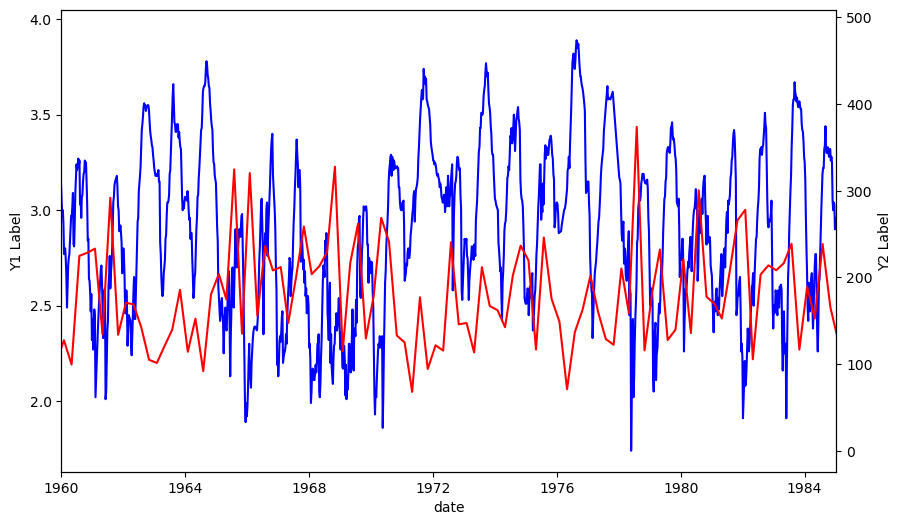

In [84]:
# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first DataFrame on the primary y-axis
sns.lineplot(x="date", y="water_depth",
             #hue="station_id", 
             #style="event",
             #palette='tab10',
             color='b',
             data=g_filtered,
             ax=ax)

# Create a secondary y-axis
ax2 = ax.twinx()

# Plot the second DataFrame on the secondary y-axis
sns.lineplot(x="date", y="precip_mean", data=precip_resampled, ax=ax2, 
             #color='r'
            )

# Optionally, set labels for the y-axes
ax.set_ylabel('Y1 Label')
ax2.set_ylabel('Y2 Label')

# Set the x-axis limits
start_date = pd.to_datetime('1960-01-01')
end_date = pd.to_datetime('1985-01-10')
plt.xlim(start_date, end_date)

# Show the plot
plt.show()